In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import wandb
from wandb.sklearn import plot_precision_recall, plot_feature_importances
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc

In [2]:
FULL_DATA_PATH = '../data/diabetic_data_cleaned.csv'

In [3]:
df = pd.read_csv(FULL_DATA_PATH)

In [5]:
df.shape

(101766, 45)

In [5]:
le = LabelEncoder()

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
y = df['readmitted']
X = df.drop('readmitted', axis=1)

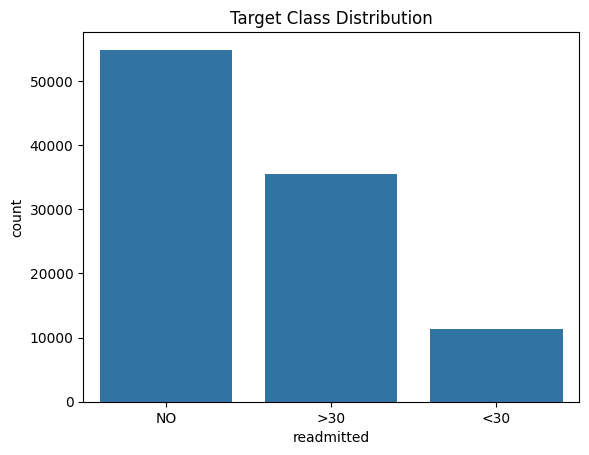

In [8]:
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

In [9]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [10]:
df_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [11]:
y_encoded = le.fit_transform(y)

In [12]:
y_encoded.shape

(101766,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_encoded, test_size=0.2, stratify=y_encoded,random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [30]:
y_test.shape

(20354,)

In [31]:
print("Original number of features:", X_train_scaled.shape[1])
print("Reduced number of features:", pca.n_components_)

Original number of features: 2328
Reduced number of features: 2004


In [1]:
X_train_pca.shape

NameError: name 'X_train_pca' is not defined

In [32]:
model = XGBRegressor(n_estimators=1000, max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train_pca, y_train)